In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings 
warnings.filterwarnings("ignore")
import numpy as np

In [63]:
file_path = 'lung_cancer_mortality_data_test_v2.csv'  
data = pd.read_csv(file_path)

In [64]:
# Convert date columns to datetime
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'], errors='coerce')
data['beginning_of_treatment_date'] = pd.to_datetime(data['beginning_of_treatment_date'], errors='coerce')
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'], errors='coerce')

In [65]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64


In [66]:
data.duplicated().sum()

0

In [67]:
data.isna().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [68]:
data.dtypes

id                                      int64
age                                   float64
gender                                 object
country                                object
diagnosis_date                 datetime64[ns]
cancer_stage                           object
beginning_of_treatment_date    datetime64[ns]
family_history                         object
smoking_status                         object
bmi                                   float64
cholesterol_level                       int64
hypertension                            int64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                         object
end_treatment_date             datetime64[ns]
survived                                int64
dtype: object

In [69]:
data.info

<bound method DataFrame.info of        id   age  gender   country diagnosis_date cancer_stage  \
0       1  64.0  Female  Slovakia     2016-04-07     Stage IV   
1       2  50.0    Male  Slovenia     2023-04-22    Stage III   
2       3  65.0    Male     Italy     2023-04-07     Stage II   
3       4  51.0    Male    Latvia     2016-02-07      Stage I   
4       5  37.0  Female     Spain     2023-12-01     Stage II   
..    ...   ...     ...       ...            ...          ...   
995   996  59.0  Female   Finland     2023-05-17      Stage I   
996   997  46.0    Male   Belgium     2014-12-03    Stage III   
997   998  48.0  Female   Finland     2022-11-02     Stage II   
998   999  65.0  Female  Bulgaria     2015-12-25      Stage I   
999  1000  58.0  Female     Spain     2015-08-09      Stage I   

    beginning_of_treatment_date family_history  smoking_status   bmi  \
0                    2016-04-09             No   Former Smoker  21.2   
1                    2023-05-05            

In [70]:
data.describe()
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0
1,2,50.0,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0
2,3,65.0,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1
3,4,51.0,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0
4,5,37.0,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0


In [71]:
data.replace("?",np.nan,inplace=True)

In [72]:
#data["bmi"].bfill()
#data["cholesterol_level"].ffill()
#mean = data["hypertension"].mean()
#data["hypertension"].replace(np.nan, mean, inplace=True)

#mean = data["asthma"].mean()
#data["asthma"].replace(np.nan, mean, inplace=True)
#median = data["cirrhosis"].median()    #replace by median because there are outliers in this column
#data["cirrhosis"].replace(np.nan,median,inplace=True)

In [73]:
numerical_columns = ['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']

In [74]:
correlation_matrix = data[numerical_columns].corr()
correlation_matrix

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
age,1.000000,0.047826,0.038886,-0.011724,0.093144,0.013209,0.017877,0.035685
bmi,0.047826,1.000000,0.770690,0.018129,0.044755,0.027073,0.003847,-0.015421
cholesterol_level,0.038886,0.770690,1.000000,0.034337,0.037953,0.016768,0.016276,-0.020087
hypertension,-0.011724,0.018129,0.034337,1.000000,0.050551,0.095746,0.098356,0.047472
asthma,0.093144,0.044755,0.037953,0.050551,1.000000,0.046212,-0.029829,-0.007872
cirrhosis,0.013209,0.027073,0.016768,0.095746,0.046212,1.000000,0.011651,-0.011301
other_cancer,0.017877,0.003847,0.016276,0.098356,-0.029829,0.011651,1.000000,-0.022844
survived,0.035685,-0.015421,-0.020087,0.047472,-0.007872,-0.011301,-0.022844,1.000000


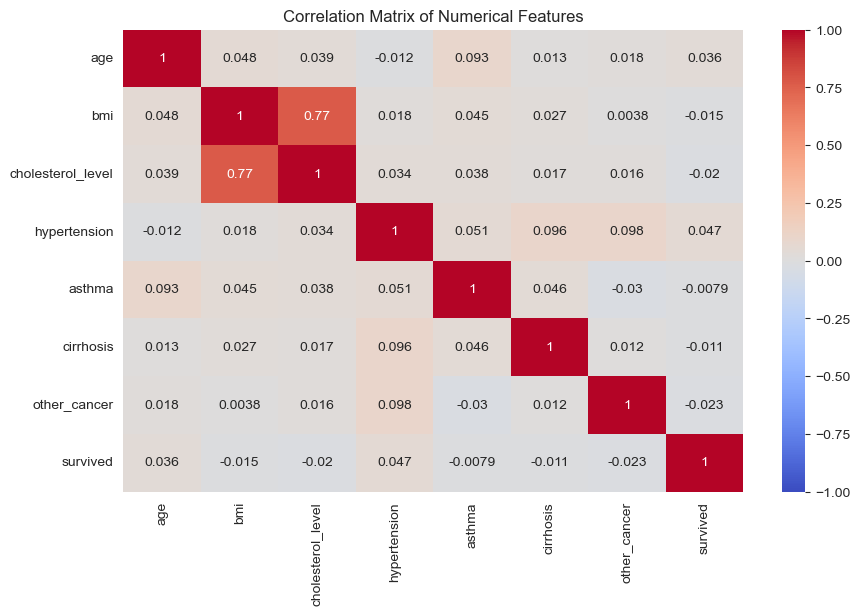

In [75]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

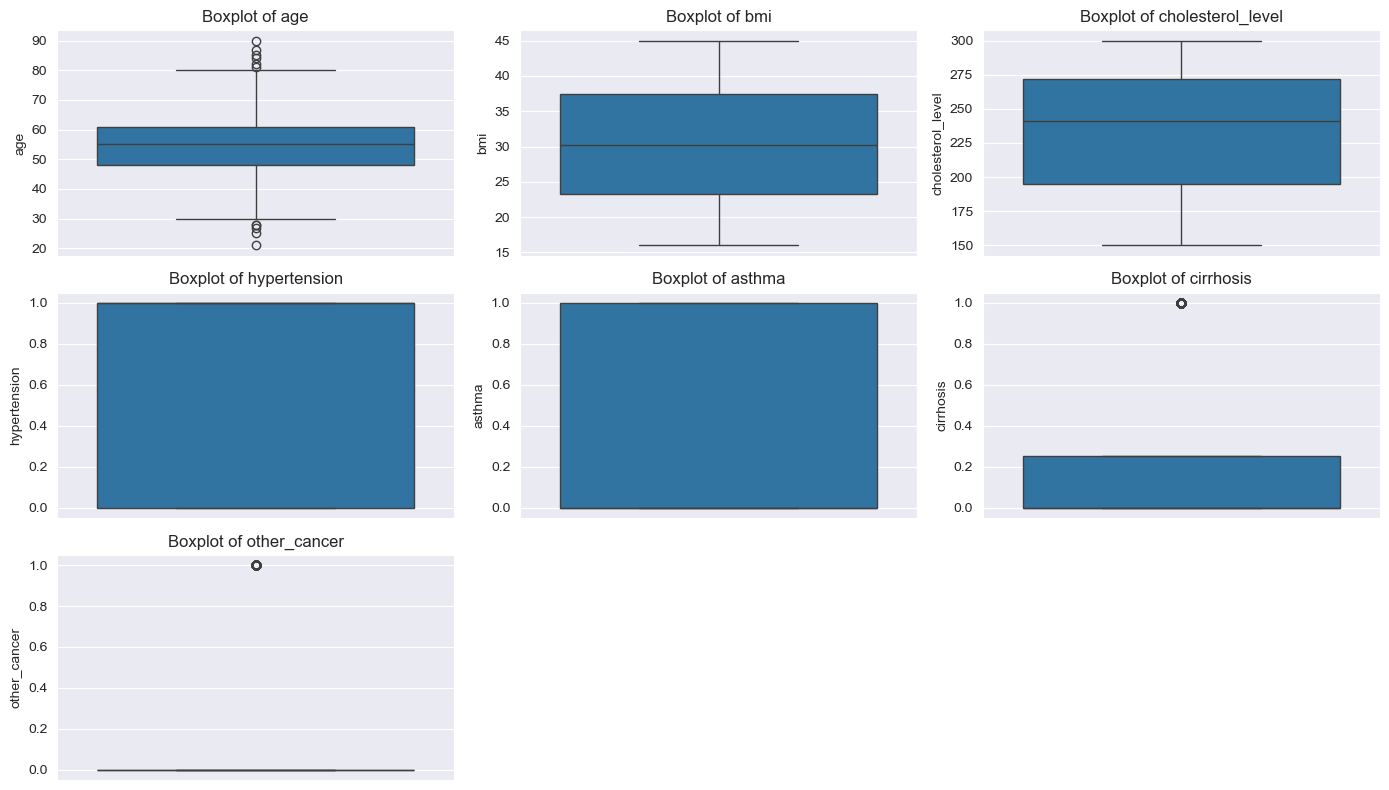

In [76]:
# Create box plots to detect outliers in selected numerical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns[:-1], 1):  # exclude 'survived' for box plot
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [77]:
# Function to detect outliers for specific columns using IQR 
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        # Find outliers for this specific column
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        # Print out the detected outliers
        print(f"Outliers in {col}:\n{outliers[col]}\n")
    return outliers

# Example usage
outliersfind = detect_outliers_iqr(data, ['age', 'bmi', 'cholesterol_level', 'cirrhosis'])


Outliers in age:
23     21.0
477    85.0
518    28.0
576    87.0
721    28.0
755    25.0
760    90.0
814    84.0
823    81.0
848    27.0
960    82.0
Name: age, dtype: float64

Outliers in bmi:
Series([], Name: bmi, dtype: float64)

Outliers in cholesterol_level:
Series([], Name: cholesterol_level, dtype: int64)

Outliers in cirrhosis:
2      1
10     1
12     1
13     1
16     1
      ..
981    1
983    1
987    1
993    1
995    1
Name: cirrhosis, Length: 250, dtype: int64



               bmi  cholesterol_level
count  1000.000000        1000.000000
mean     30.347200         233.174000
std       8.287035          43.613299
min      16.000000         150.000000
25%      23.300000         195.000000
50%      30.200000         241.000000
75%      37.500000         272.000000
max      45.000000         300.000000


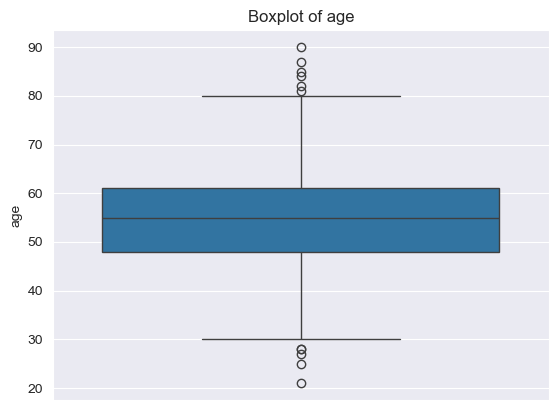

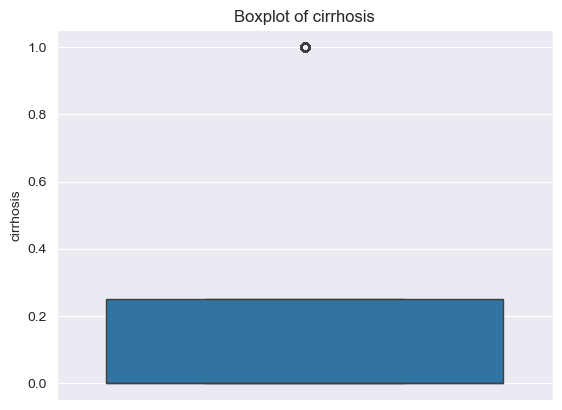

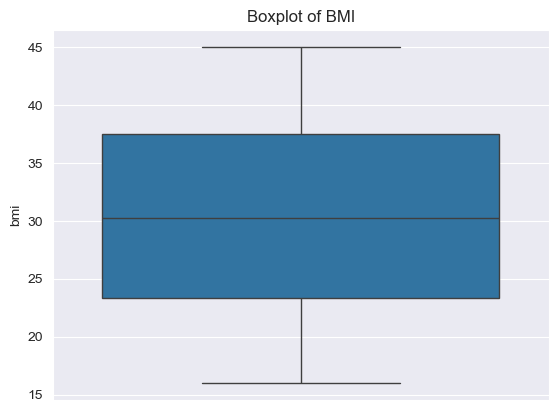

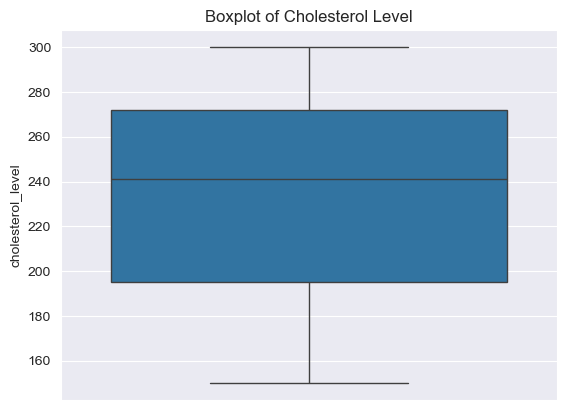

In [78]:
print(data[['bmi', 'cholesterol_level']].describe())
sns.boxplot(data['age'])
plt.title('Boxplot of age')
plt.show()

sns.boxplot(data['cirrhosis'])
plt.title('Boxplot of cirrhosis')
plt.show()

sns.boxplot(data['bmi'])
plt.title('Boxplot of BMI')
plt.show()

sns.boxplot(data['cholesterol_level'])
plt.title('Boxplot of Cholesterol Level')
plt.show()


# As we can see there are no outliers in BMI and CHOLESTEROL_LEVEL we can move forward

In [79]:
# Prepare features and target variable
features = ['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
X = data[features]
y = data['survived']

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [81]:
# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Simple Linear Regression:
R2 Score: 0.0021410785828474
Mean Squared Error: 0.16935883360718895


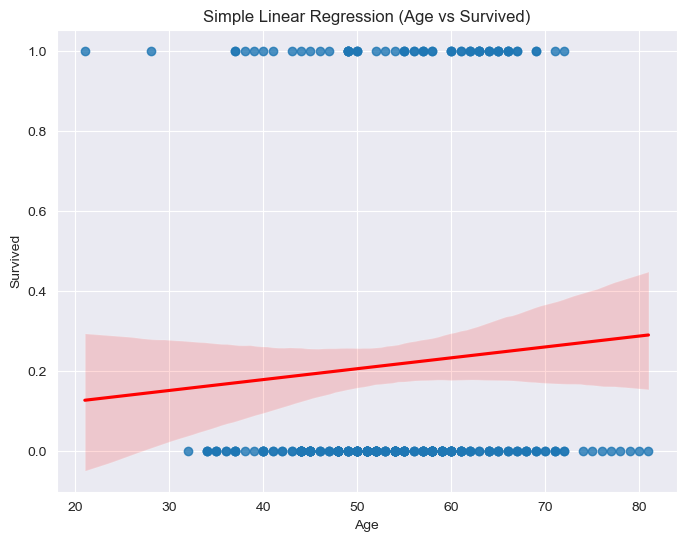

In [82]:
# --- SIMPLE LINEAR REGRESSION (on age vs survived) ---
print("\nSimple Linear Regression:")
linear_regressor = LinearRegression()
linear_regressor.fit(X_train[['age']], y_train)
y_pred_linear = linear_regressor.predict(X_test[['age']])
print(f"R2 Score: {r2_score(y_test, y_pred_linear)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}")

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['age'], y=y_test, line_kws={"color": "red"})
plt.title('Simple Linear Regression (Age vs Survived)')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


Multiple Linear Regression:
R2 Score: -0.017661096427915357
Mean Squared Error: 0.17271970275484894


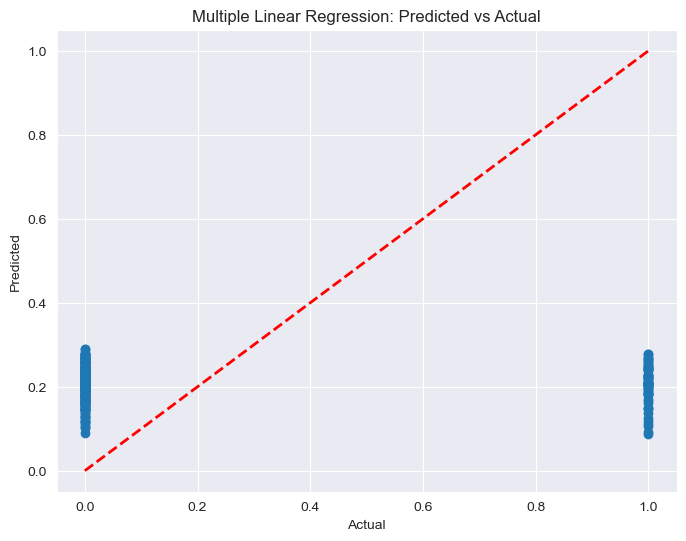

In [83]:
# --- MULTIPLE LINEAR REGRESSION (using all features) ---
print("\nMultiple Linear Regression:")
linear_regressor_multiple = LinearRegression()
linear_regressor_multiple.fit(X_train, y_train)
y_pred_multiple = linear_regressor_multiple.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_multiple)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_multiple)}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multiple)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### As we can see the r^2 score is negative that means the multiple Linear Regression is not performing good with the data curve available


Simple Polynomial Regression:
R2 Score: 0.004675689967809538
Mean Squared Error: 0.16892865373046342


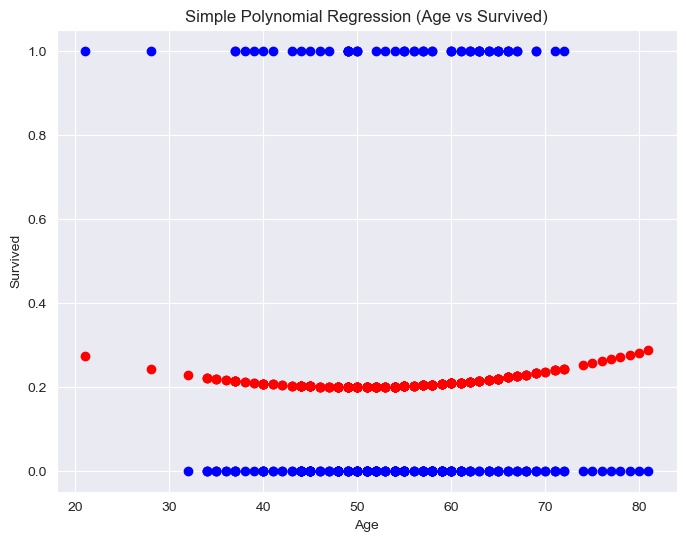

In [84]:
# --- SIMPLE POLYNOMIAL REGRESSION (on age) ---
print("\nSimple Polynomial Regression:")
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[['age']])
X_test_poly = poly.transform(X_test[['age']])
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)
y_pred_poly = poly_regressor.predict(X_test_poly)
print(f"R2 Score: {r2_score(y_test, y_pred_poly)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly)}")

plt.figure(figsize=(8, 6))
plt.scatter(X_test['age'], y_test, color='blue')
plt.scatter(X_test['age'], y_pred_poly, color='red')
plt.title('Simple Polynomial Regression (Age vs Survived)')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


Multiple Polynomial Regression:
R2 Score: -0.01914071055312805
Mean Squared Error: 0.17297082615221143


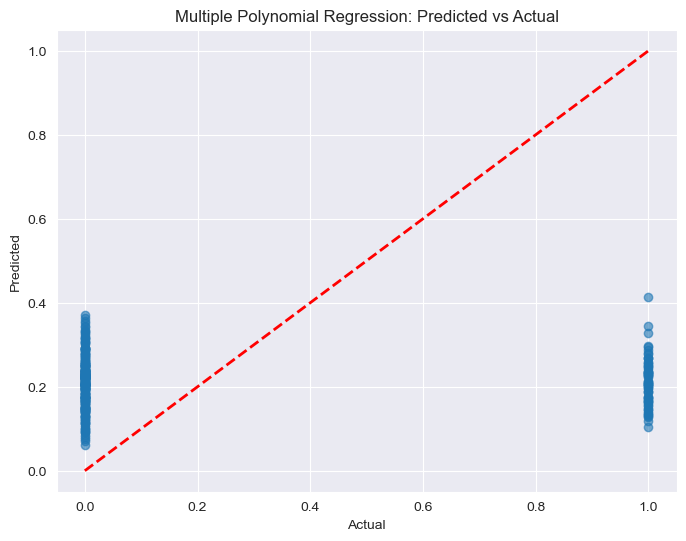

In [85]:
# --- MULTIPLE POLYNOMIAL REGRESSION (using all features) ---
print("\nMultiple Polynomial Regression:")
poly_multiple = PolynomialFeatures(degree=2)
X_poly_multiple = poly_multiple.fit_transform(X_train)
X_test_poly_multiple = poly_multiple.transform(X_test)
poly_regressor_multiple = LinearRegression()
poly_regressor_multiple.fit(X_poly_multiple, y_train)
y_pred_poly_multiple = poly_regressor_multiple.predict(X_test_poly_multiple)
print(f"R2 Score: {r2_score(y_test, y_pred_poly_multiple)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly_multiple)}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly_multiple, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Multiple Polynomial Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### same is the situation with multiple polynomial regression


Lasso Regression with Scaling:
R2 Score: -0.00026186579378095765
Mean Squared Error: 0.16976666666666668


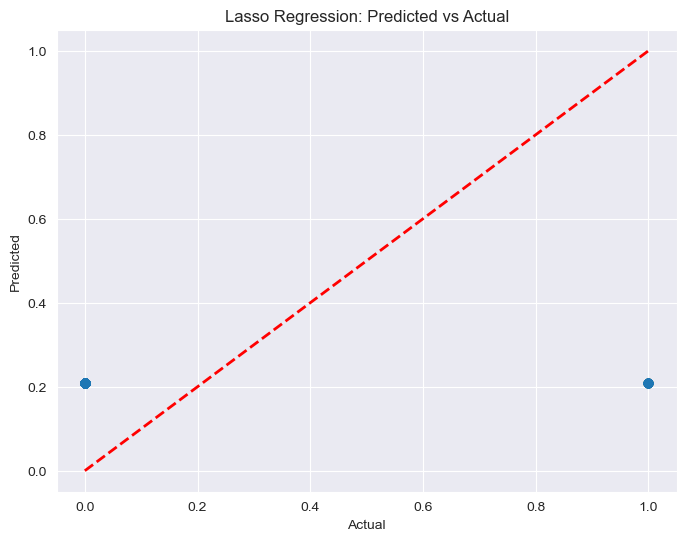

In [86]:
# --- LASSO REGRESSION ---
print("\nLasso Regression with Scaling:")
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_regressor.predict(X_test_scaled)
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Lasso Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Ridge Regression with Scaling:
R2 Score: -0.017652524232003364
Mean Squared Error: 0.17271824786270945


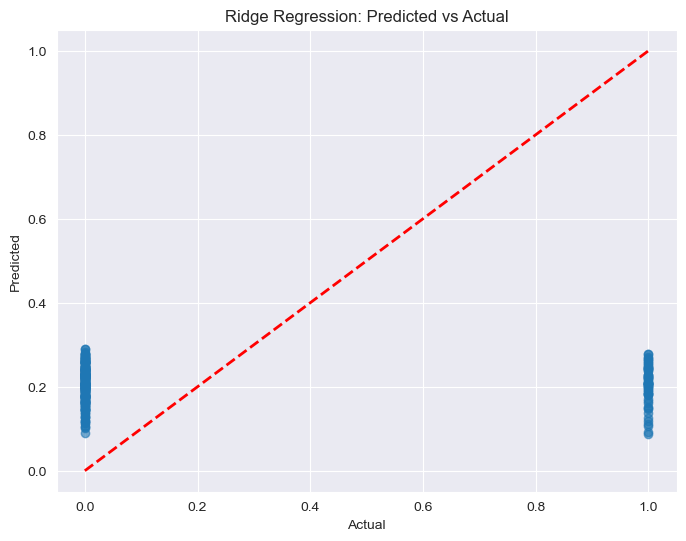

In [87]:
# --- RIDGE REGRESSION ---
print("\nRidge Regression with Scaling:")
ridge_regressor = Ridge(alpha=0.1)
ridge_regressor.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_regressor.predict(X_test_scaled)
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Ridge Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Decision Tree Regressor:
R2 Score: -0.8657937806873979
Mean Squared Error: 0.31666666666666665


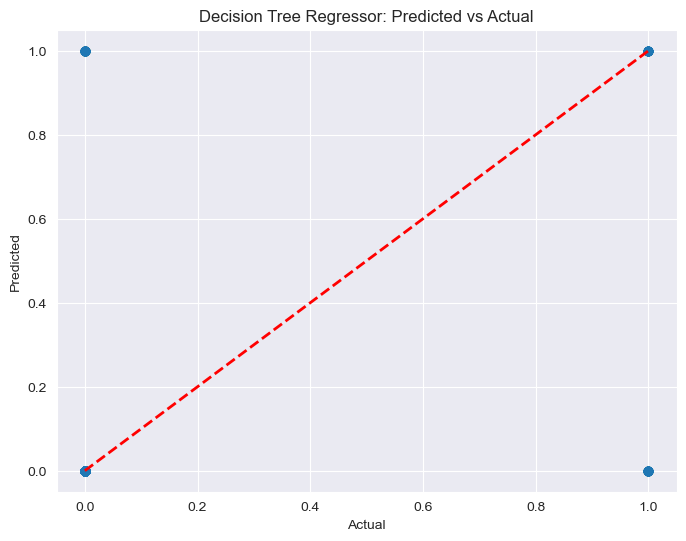

In [88]:
# --- DECISION TREE REGRESSOR ---
print("\nDecision Tree Regressor:")
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_tree)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_tree)}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Decision Tree Regressor: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


K-Nearest Neighbors Regressor:
R2 Score: -0.18153846153846187
Mean Squared Error: 0.20053333333333337


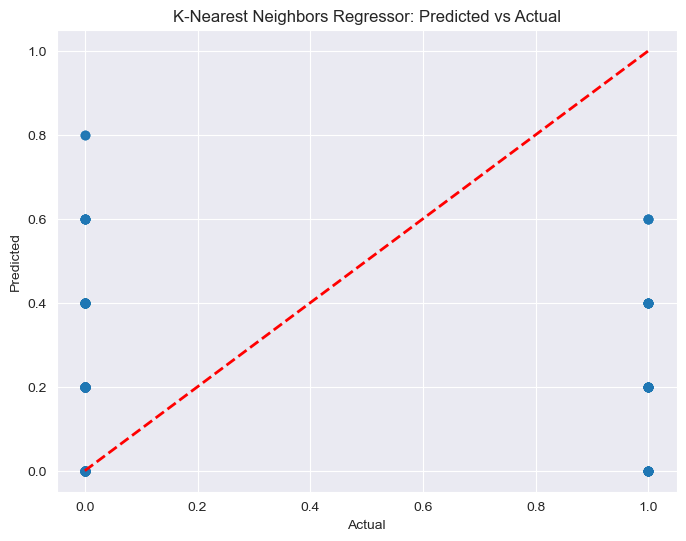

In [89]:
# --- K-NEAREST NEIGHBORS REGRESSOR ---
print("\nK-Nearest Neighbors Regressor:")
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_knn)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_knn)}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('K-Nearest Neighbors Regressor: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# We can say that the Simple Linear Regression and Simple Polynomial Regression works for our data and that too it performs poorly